In [68]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np


,urbanrate,incomeperperson
1,46.72,1914.996551
2,65.22,2231.993335
3,88.92,21943.339900
4,56.70,1381.004268
5,30.46,11894.464070


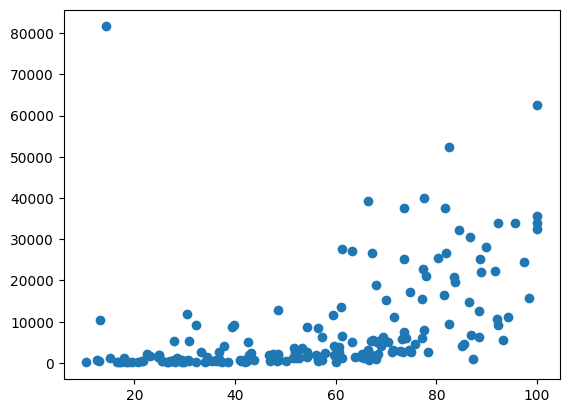

In [69]:
df = pd.read_csv('gapminder_internet.csv')
df = df.dropna()
df = df[["urbanrate","incomeperperson"]]
X = np.array(df)
xp = X[:,0]
yp = X[:,1]
plt.scatter(x = xp, y = yp)
df.head()

In [70]:
km = KMeans (n_clusters= 3,
init = 'random', n_init= 10, 
max_iter= 300, tol= 0.01, random_state=0 
)
y_km = km.fit_predict(X)

print(X[y_km == 0,0])


[88.92 30.46 88.74 67.16 83.7  88.52 97.36 74.82 80.4  69.9  63.3  77.36
 73.64 61.   83.52 61.34 91.66 68.08 81.46 94.26 81.82 86.56 71.62 59.46
 98.32 48.6  77.12 77.88 89.94]


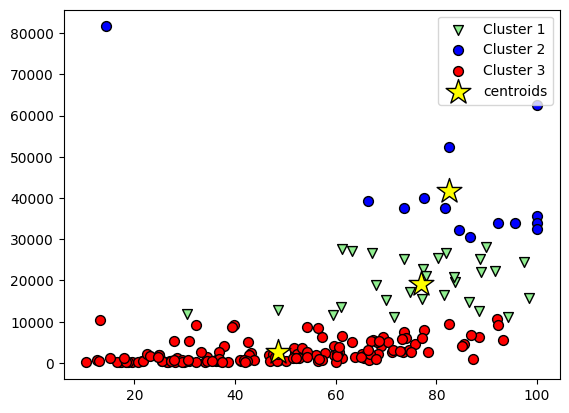

In [71]:
plt.scatter(
    X[y_km == 0, 0], X[y_km == 0, 1],
    s=50, c='lightgreen',
    marker='v', edgecolor='black',
    label='Cluster 1'
)

plt.scatter(
    X[y_km == 1, 0], X[y_km == 1, 1],
    s=50, c='blue',
    marker='o', edgecolor='black',
    label='Cluster 2'
)

plt.scatter(
    X[y_km == 2, 0], X[y_km == 2, 1],
    s=50, c='red',
    marker='o', edgecolor='black',
    label='Cluster 3'
)


plt.scatter(
    km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
    s=350, marker='*',
    c='yellow', edgecolor='black',
    label='centroids'
)
plt.legend(scatterpoints=1)
plt.show()

In [72]:
distortions = []
for i in range(1, 11):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(X)
    distortions.append(km.inertia_)

print(distortions)

[28325442116.151405, 7667951623.096118, 4548265347.355182, 2033197028.1744232, 1352599072.1492429, 933971205.6628994, 544983744.4934937, 447495400.4700748, 427028775.46680444, 318774506.60969627]


In [73]:
from kneed import KneeLocator

k1 = KneeLocator(range(1,11), distortions, curve = "convex", direction="decreasing")
k1.elbow


3

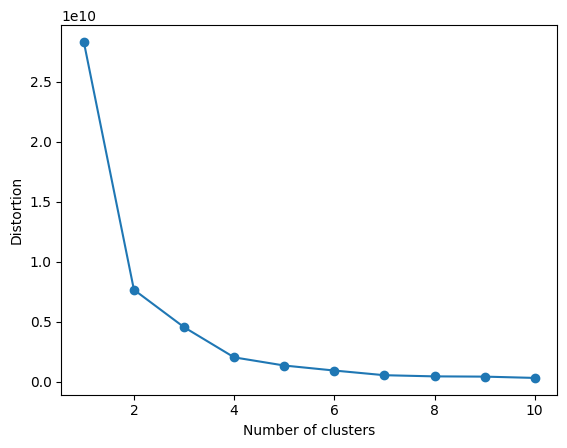

In [74]:
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()
